In [352]:
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

from math import *

In [353]:
N_grid=1000
L=10

dw=0.1

In [354]:
t=np.linspace(0, L, N_grid)
h=t[2]-t[1]

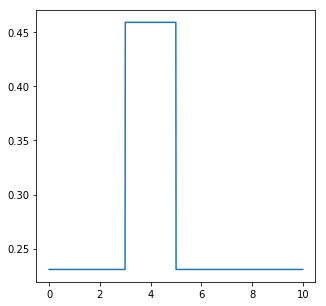

In [355]:
C0=np.array([0.5]*N_grid)
C0[300:500]=0.9

phi_0=np.arccos(C0)

k0=np.divide(np.array([2*dw]*N_grid), np.sin(phi_0))

plt.figure(figsize=(5, 5))
plt.plot(t, k0)
plt.show()

In [356]:
dphi_0=np.diff(phi_0)/h
dphi_0=np.append(dphi_0[1], dphi_0)

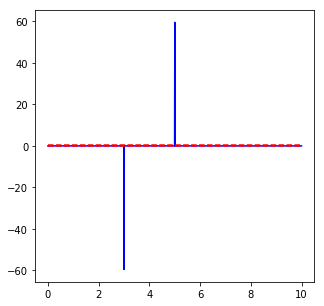

In [357]:
plt.figure(figsize=(5,5))
plt.plot(t, dphi_0, 'b')
plt.plot(t, [2*dw]*N_grid, 'r--')
plt.plot(t, [-2*dw]*N_grid, 'r--')
plt.show()

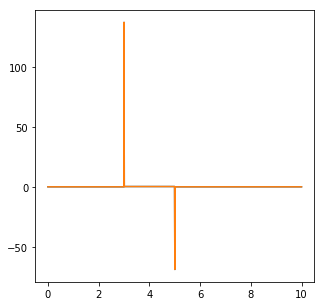

In [366]:
k=np.divide(np.array([2*dw]*N_grid)-dphi_0, np.sin(phi_0))
k_f=interpolate.interp1d(t, k, bounds_error=False, fill_value="extrapolate")

plt.figure(figsize=(5, 5))
plt.plot(t, k)
plt.plot(t, k_f(t))
plt.show()

In [359]:
def deriv_z(z, t2, dw, k_f):
    return 2*dw-sin(z)*k_f(t2)

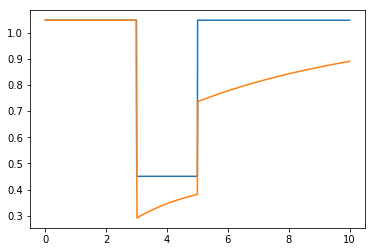

In [360]:
theta = integrate.odeint(deriv_z, phi_0[1], t, (dw, k_f,))
theta=theta.ravel()

plt.plot(t, phi_0)
plt.plot(t, theta)
plt.show()

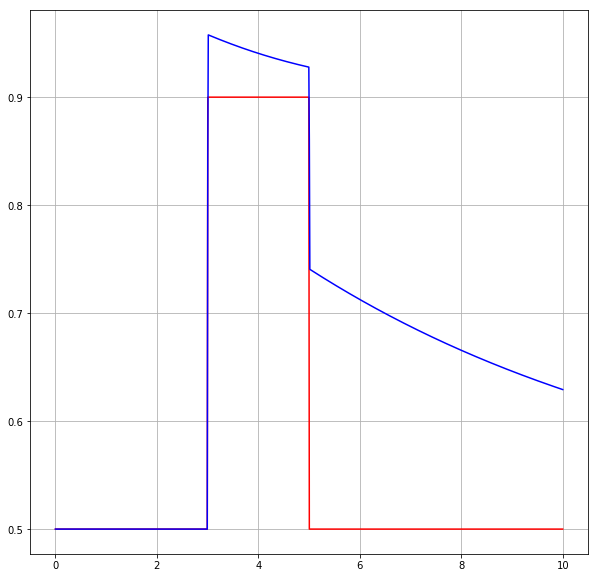

In [361]:
C0_hat=np.cos(theta)

plt.figure(figsize=(10,10))
plt.grid(True)
plt.plot(t, C0, 'r')
plt.plot(t, C0_hat, 'b')
plt.show()

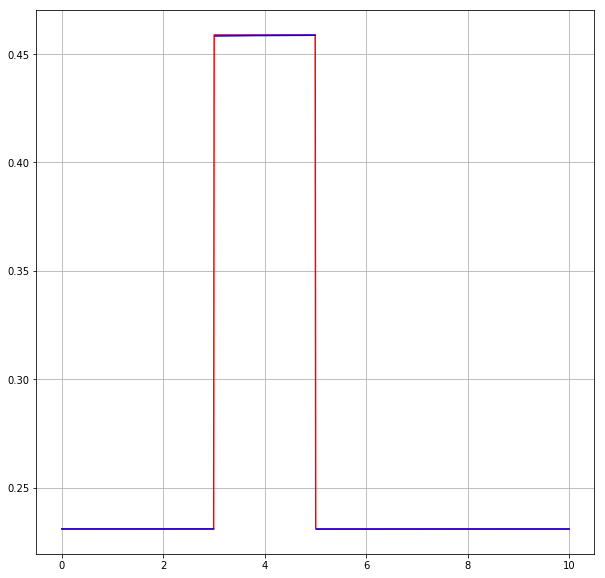

In [364]:
dphi_hat=np.diff(theta)/h
dphi_hat=np.append(dphi_hat[1], dphi_hat)
k_hat=np.divide(np.array([2*dw]*N_grid)-dphi_hat, np.sin(theta))

for i in range(N_grid):
    if (abs(k_hat[i])>1):
        k_hat[i]=nan
        
plt.figure(figsize=(10,10))
plt.grid(True)
plt.plot(t, k0, 'r')
plt.plot(t, k_hat, 'b')
plt.show()